In [14]:
%pip install matplotlib

import pandas as pd

df = pd.read_csv("../data/processed/aave3_cross_chain_deposits_clean.csv")
df.head()


Note: you may need to restart the kernel to use updated packages.


,blockchain,day,txs,users,volume,volume_7d_blockchain,total_volume_all_chains,volume_share
0,arbitrum,2024-11-13 00:00:00+00:00,3143,1393,4.326370e+07,4.326370e+07,5.727725e+08,0.075534
1,arbitrum,2024-11-14 00:00:00+00:00,3515,1549,5.300827e+07,9.627197e+07,1.170370e+09,0.045292
2,arbitrum,2024-11-15 00:00:00+00:00,3259,1524,5.091933e+07,1.471913e+08,1.141287e+09,0.044616
3,arbitrum,2024-11-16 00:00:00+00:00,2535,1258,3.877920e+07,1.859705e+08,1.485587e+09,0.026104
4,arbitrum,2024-11-17 00:00:00+00:00,2553,1212,3.023572e+07,2.162062e+08,1.181150e+09,0.025599


In [15]:
df.info()
df.describe(include='all')
df.isna().sum()
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blockchain               2196 non-null   object 
 1   day                      2196 non-null   object 
 2   txs                      2196 non-null   int64  
 3   users                    2196 non-null   int64  
 4   volume                   2196 non-null   float64
 5   volume_7d_blockchain     2196 non-null   float64
 6   total_volume_all_chains  2196 non-null   float64
 7   volume_share             2196 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 137.4+ KB


In [16]:
df['day'] = pd.to_datetime(df['day'])
df = df.sort_values('day')


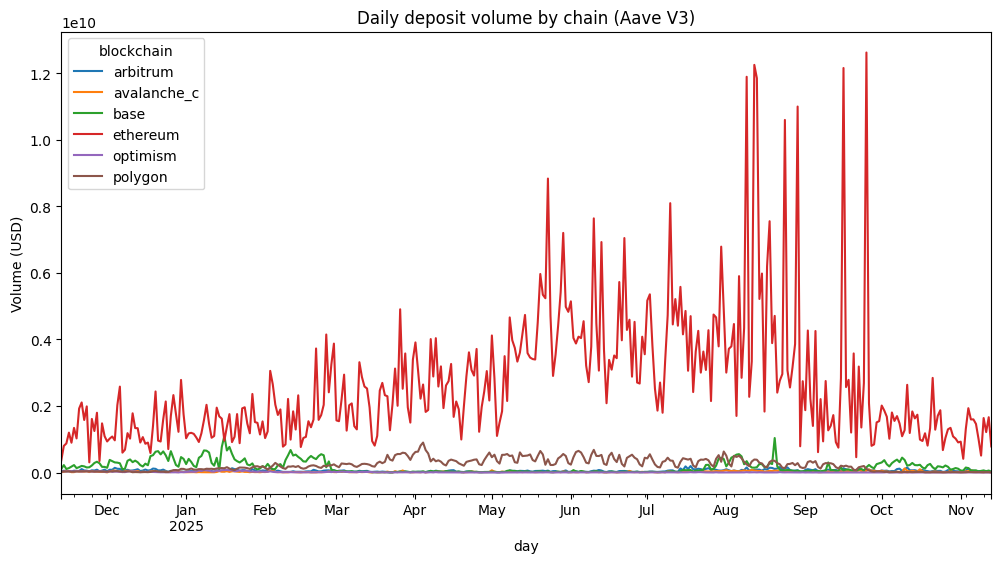

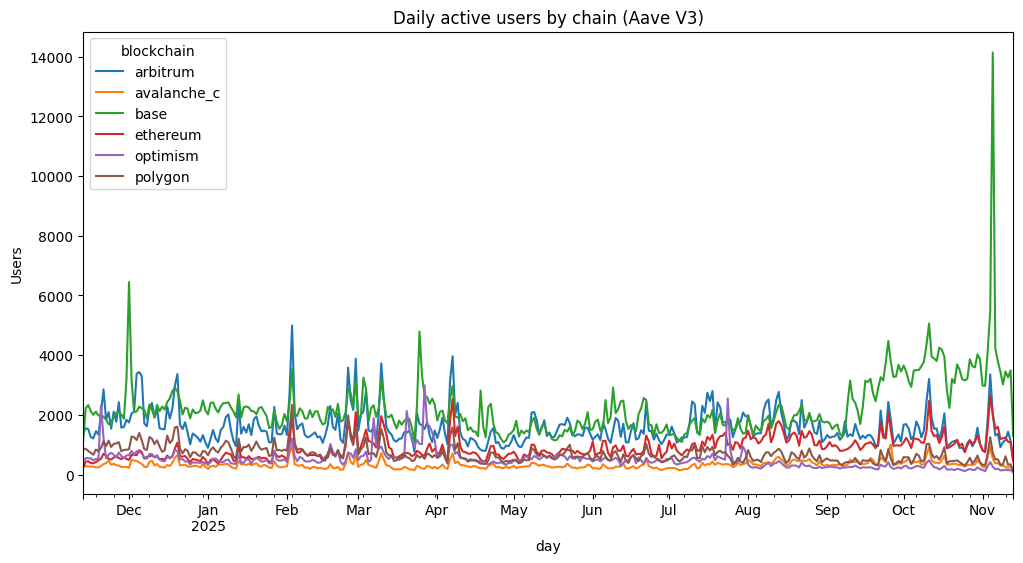

In [20]:
pivot_volume = df.pivot_table(
    index="day",
    columns="blockchain",
    values="volume",
    aggfunc="sum"
)

pivot_volume.plot(figsize=(12, 6))
plt.title("Daily deposit volume by chain (Aave V3)")
plt.ylabel("Volume (USD)")
plt.show()
pivot_users = df.pivot_table(
    index="day",
    columns="blockchain",
    values="users",
    aggfunc="sum"
)   

pivot_users.plot(figsize=(12, 6))
plt.title("Daily active users by chain (Aave V3)")
plt.ylabel("Users")
plt.show()
pivot_volume_share = df.pivot_table(
    index="day",
    columns="blockchain",
    values="volume_share",
    aggfunc="mean"
)


ETH remains the chain with the highest daily deposit volume on Aave v3, but it has dropped sharply — from more than $1.2 billion at the end of September 2025 to less than $200 million recently.
Meanwhile, the Base chain has surpassed Arbitrum and Ethereum to become the largest network in terms of daily active users, which is a surprising development.

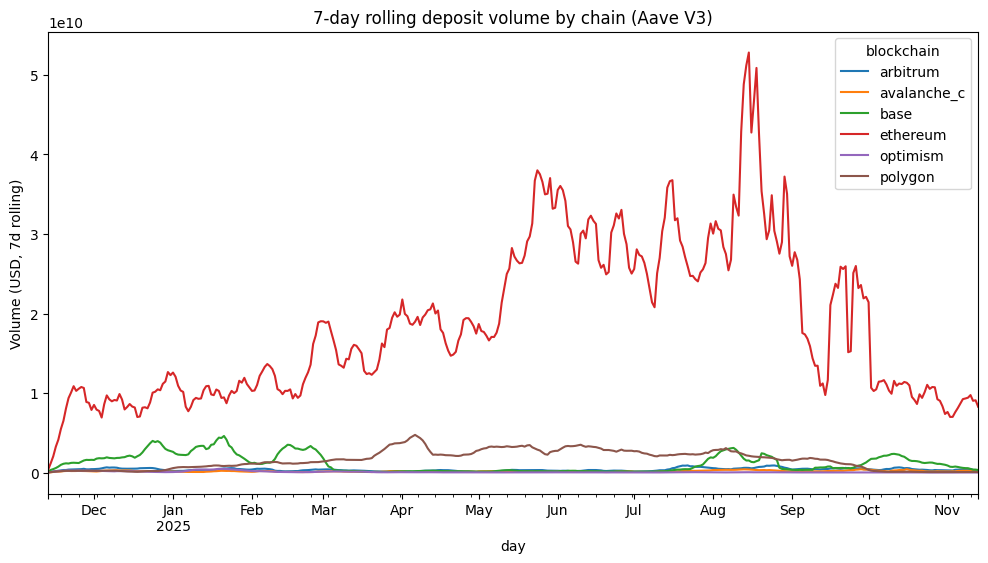

In [26]:
pivot_roll = df.pivot_table(
    index="day",
    columns="blockchain",
    values="volume_7d_blockchain",
    aggfunc="sum"
)

pivot_roll.plot(figsize=(12, 6))
plt.title("7-day rolling deposit volume by chain (Aave V3)")
plt.ylabel("Volume (USD, 7d rolling)")
plt.show()

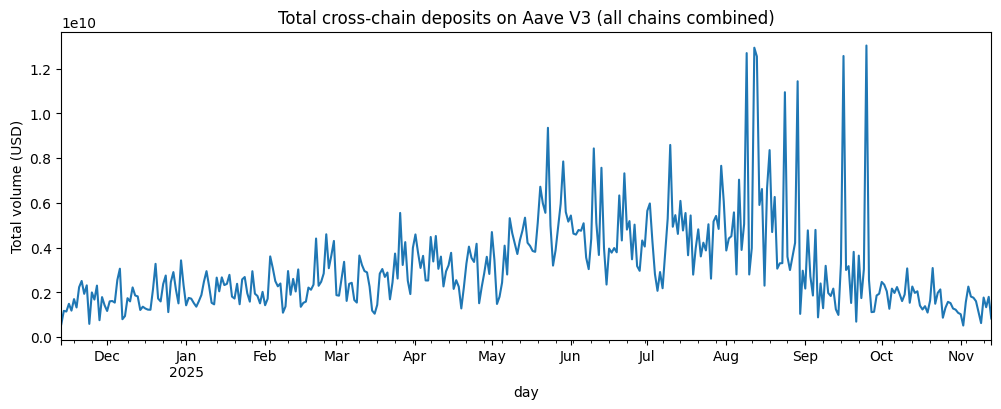

In [27]:
daily_total = (
    df.groupby("day")["total_volume_all_chains"]
      .first()   
)

daily_total.plot(figsize=(12, 4))
plt.title("Total cross-chain deposits on Aave V3 (all chains combined)")
plt.ylabel("Total volume (USD)")
plt.show()


Total cross-chain deposits have fallen significantly since October 2025. The decline coincides with heightened macroeconomic volatility, which has fueled investor fear and led to reduced capital flows into the crypto market.

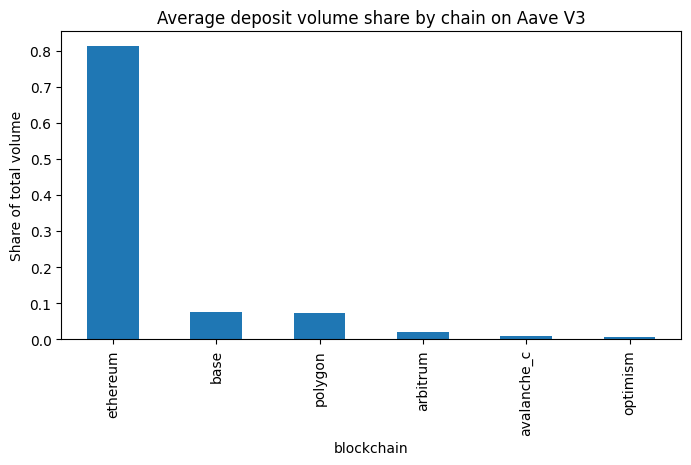

In [28]:
share_by_chain = df.groupby("blockchain")["volume_share"].mean().sort_values(ascending=False)
share_by_chain.plot(kind="bar", figsize=(8,4))
plt.title("Average deposit volume share by chain on Aave V3")
plt.ylabel("Share of total volume")
plt.show()
import pandas as pd
from pathlib import Path

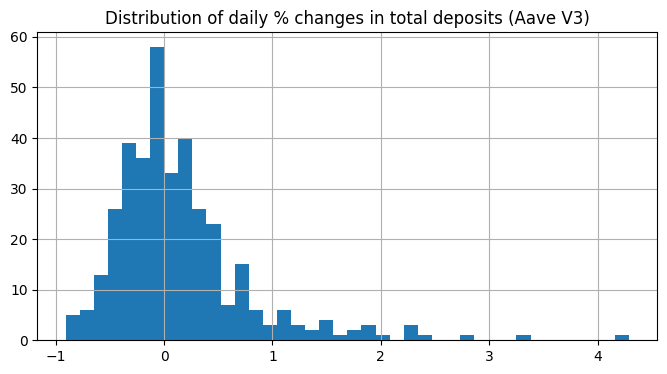

In [29]:
daily_total = daily_total.sort_index()
daily_total_pct = daily_total.pct_change()

daily_total_pct.hist(bins=40, figsize=(8,4))
plt.title("Distribution of daily % changes in total deposits (Aave V3)")
plt.show()
# --- IGNORE ---


- Most daily cross-chain deposits on Aave V3 are stable and clustered around 0%,
  showing strong protocol stickiness and predictable deposit behavior.
- However, a long right tail exists, meaning some days experience unusually large inflows,
  likely driven by incentives, profit rotation, or liquidity mining activity.
- Negative tail events are less frequent but meaningful, representing temporary deposit exits
  during market volatility or liquidation stress.
- These tail behaviors are crucial for Aave's risk and collateral modeling, where rare events define systemic stress more than normal days.

